Installed Packages MathNet.Numerics, 5.0.0 ScottPlot, 4.1.60


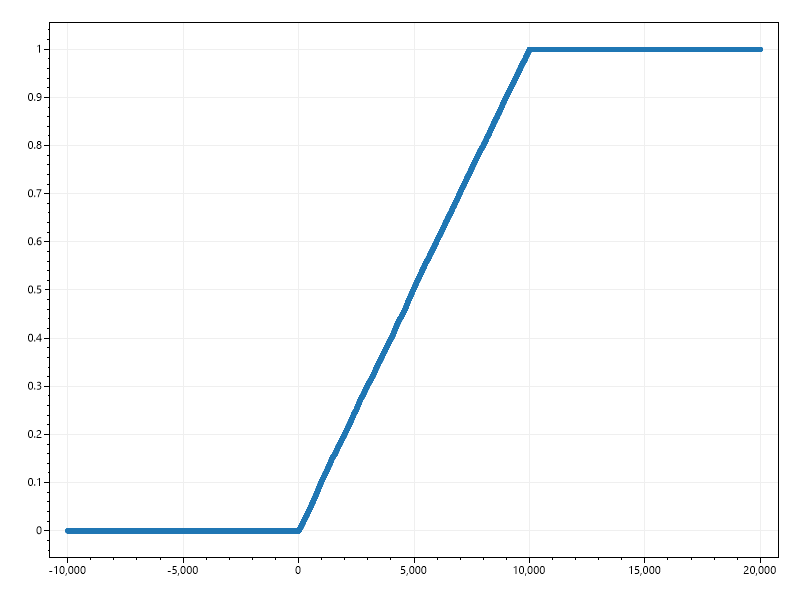

In [2]:
#r "..\Statsetera\bin\Debug\net6.0\Statsetera.dll"
#r "nuget:MathNet.Numerics"
// Install the ScottPlot NuGet package
#r "nuget:ScottPlot"
using MathNet.Numerics.Random;
using Statsetera;

// Setup a custom formatter to display plots as images
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (plt, writer) => 
    writer.Write(((ScottPlot.Plot)plt).GetImageHTML()), HtmlFormatter.MimeType);

RandomSource rng = new MersenneTwister();
var randomSeq = rng.NextInt32Sequence(0, 10000).Select(Convert.ToDouble).Take(10000);
var FUniform = Stats.EmpiricalDistributionFunction(randomSeq);
var alpha = 0.05;
var x = Enumerable.Range(-10000, 30000).Select(Convert.ToDouble);
var y = x.Select(x => FUniform(x, alpha).Item1);
var plt = new ScottPlot.Plot(800, 600);
plt.AddScatter(x.ToArray(), y.ToArray());
plt


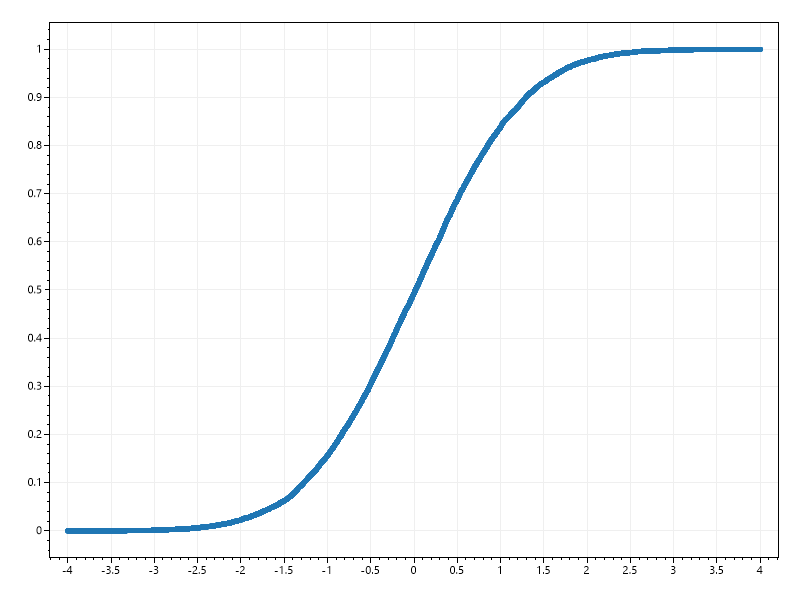

In [3]:
using MathNet.Numerics.Distributions;
var normalSeq = Normal.Samples(new MersenneTwister(), 0.0, 1.0).Take(10000);
var FNormal = Stats.EmpiricalDistributionFunction(normalSeq);
x = Enumerable.Range(-40000, 80000).Select(x => (double)x/10000);
y = x.Select(x => FNormal(x, alpha).Item1);
var plt2 = new ScottPlot.Plot(800, 600);
plt2.AddScatter(x.ToArray(), y.ToArray());
plt2
